# AEGAN datasets benchmark

In [1]:
import pandas as pd
import os 
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')
from steps.sequence_search_blast import BLAST
from steps.save_step import Save

# Basically want to run blast on each of the datasets and see how many get the correct active site
# We do this filtering first to remove them from the sequence set
data_dir = '/disk1/ariane/vscode/squidly/aegan_structures/AEGAN_extracted_sequences/'
files = os.listdir(data_dir)
swissprot = pd.read_csv('swissprot.tsv', sep='\t') 

def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
swissprot = swissprot[swissprot['active_site_residue_counts'] > 0]
training_ids = set(pd.read_csv('AEGAN_real_training_set.txt', header=None)[0].values)
swissprot = swissprot[swissprot['Entry'].isin(training_ids)]
for f in files:
    try:
        df = pd.read_csv(f'{data_dir}{f}/{f}.tsv', sep='\t')
        entries = set(list(df['Entry'].values))
        # Remove from SwissProt
        # Now we're going to save this as a fasta file 
        fasta_label = f'AEGAN_with_active_site_seqs_{f}.fasta'
        with open(fasta_label, 'w+') as fout:
            for entry, seq in swissprot[['Entry', 'Sequence']].values:
                if entry not in entries:
                    fout.write(f'>{entry}\n{seq}\n')
        # Do blast on this dataset 
        # This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
        # This contains the models and the data needed to run the tool
        id_col = 'Entry'
        seq_col = 'Sequence'
        df << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'blast/{f}_BLAST.pkl'))
    except:
        print(f)

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_PC.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.031s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9870
  Database letters  4032426
     Database hash  129885c69cb938b471437545d84ffcb5
        Total time  0.058000s


['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpqn2wqy3a/hZla6N4uTA_db', '-q', '/tmp/tmpqn2wqy3a/hZla6N4uTA_query.fasta', '-o', '/tmp/tmpqn2wqy3a/hZla6N4uTA_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpqn2wqy3a/hZla6N4uTA_db -q /tmp/tmpqn2wqy3a/hZla6N4uTA_query.fasta -o /tmp/tmpqn2wqy3a/hZla6N4uTA_matches.tsv	
--------------------------------------------------------------------------------
PC
NN
['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpzs3h6gh7/xijZS76dYf_db', '-q', '/tmp/tmpzs3h6gh7/xijZS76dYf_query.fasta', '-o', '/tmp/tmpzs3h6gh7/xijZS76dYf_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpzs3h6gh7/xijZS76dYf_db -q /tmp/tmpzs3h6gh7/xijZS76dYf_query.fasta -o /tmp/tmpzs3h6gh7/xijZS76dYf_matches.tsv	
-------------------------------------------------

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_NN.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences... diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_EF_superfamily.fasta
Opening the database file...  [0.002s]
Loadin

EF_superfamily
['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpdy0yxno0/Ny8ZauSs8j_db', '-q', '/tmp/tmpdy0yxno0/Ny8ZauSs8j_query.fasta', '-o', '/tmp/tmpdy0yxno0/Ny8ZauSs8j_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpdy0yxno0/Ny8ZauSs8j_db -q /tmp/tmpdy0yxno0/Ny8ZauSs8j_query.fasta -o /tmp/tmpdy0yxno0/Ny8ZauSs8j_matches.tsv	
--------------------------------------------------------------------------------
EF_fold
family_specific
['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpqr828nom/bC0xU8KD4o_db', '-q', '/tmp/tmpqr828nom/bC0xU8KD4o_query.fasta', '-o', '/tmp/tmpqr828nom/bC0xU8KD4o_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpqr828nom/bC0xU8KD4o_db -q /tmp/tmpqr828nom/bC0xU8KD4o_query.fasta -o /tmp/tmpqr828nom/bC0xU8KD4o_matches.tsv	
----------------

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_EF_fold.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.029s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9849
  Database letters  4024331
     Database hash  59150efa7a5f56e8f7d3242b5a243241
        Total time  0.057000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and u

EF_family
['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmpgubd09xg/3uBHXw6ZBa_db', '-q', '/tmp/tmpgubd09xg/3uBHXw6ZBa_query.fasta', '-o', '/tmp/tmpgubd09xg/3uBHXw6ZBa_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmpgubd09xg/3uBHXw6ZBa_db -q /tmp/tmpgubd09xg/3uBHXw6ZBa_query.fasta -o /tmp/tmpgubd09xg/3uBHXw6ZBa_matches.tsv	
--------------------------------------------------------------------------------
HA_superfamily
.DS_Store


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_HA_superfamily.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.03s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9836
  Database letters  4020270
     Database hash  6afe600245d2fd489d9e65e14df7c14b
        Total time  0.058000s


In [2]:
files = os.listdir('blast')
results = {}
for f in files:
    try:
        label = f.split('_BLAST.pkl')[0]
        df = pd.read_csv(f'{data_dir}{label}/{label}.tsv', sep='\t')
        entries = set(list(df['Entry'].values))
        blast_df = pd.read_pickle(f'blast/{f}')
        blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
        blast_df.drop_duplicates('query', inplace=True)
        # Then join up with all df
        blast_df.set_index('query', inplace=True)
        df.set_index('Entry', inplace=True)
        df = df.join(blast_df, how='left')
        results[f] = df
        uniprot_id_to_seq = dict(zip(swissprot.Entry, swissprot.Sequence))
        for name, seq, uniprot in df[['From', 'Sequence', 'target']].values:
            fin = f'msa/{uniprot}_{name}.fa'
            with open(fin, 'w+') as fout:
                fout.write(f'>{uniprot}\n{uniprot_id_to_seq.get(uniprot)}\n')
                fout.write(f'>{name}\n{seq}')
            # Now run clustalomega
            os.system(f'clustalo --force -i {fin} -o {fin.replace(".fa", ".msa")}')
    except:
        print(f)

EF_family_BLAST.csv
PC_BLAST.csv
EF_fold_BLAST.csv
HA_superfamily_BLAST.csv
NN_BLAST.csv
EF_superfamily_BLAST.csv
Squidly_BLAST.pkl


In [3]:
swissprot['active_site_residue_counts'].value_counts()

1    5480
2    2751
3    1375
4     255
6      18
5       8
8       1
Name: active_site_residue_counts, dtype: int64

NN_BLAST 98 0.8324022346368715 0.9085365853658537 0.7680412371134021 194 0.7314814814814815 0.1574074074074074 0.1111111111111111 0.7785493827160493
HA_superfamily_BLAST 98 0.8382066276803118 0.9033613445378151 0.7818181818181819 275 0.7105263157894737 0.15789473684210525 0.13157894736842105 0.756030701754386
PC_BLAST 98 0.8854166666666666 0.9139784946236559 0.8585858585858586 99 0.7818181818181819 0.18181818181818182 0.03636363636363636 0.8333333333333334
EF_fold_BLAST 98 0.8938906752411575 0.952054794520548 0.8424242424242424 165 0.7526881720430108 0.13978494623655913 0.10752688172043011 0.7974910394265233
EF_superfamily_BLAST 98 0.8813559322033898 0.9381443298969072 0.8310502283105022 219 0.7560975609756098 0.13008130081300814 0.11382113821138211 0.7987804878048781
EF_family_BLAST 98 0.8526011560693642 0.913312693498452 0.7994579945799458 369 0.7346938775510204 0.16326530612244897 0.10204081632653061 0.798469387755102
label 98 0.8324022346368715 0.9085365853658537 0.7680412371134021

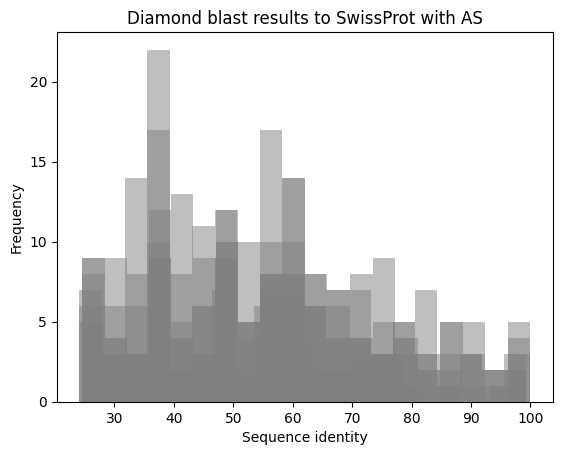

In [60]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
swissprot = pd.read_csv('swissprot.tsv', sep='\t') 

def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
uniprot_id_to_active_site = dict(zip(swissprot['Entry'], swissprot['Residue']))
for df_label in results:
    df = results[df_label]
    predicted_active_sites = {}
    missing = 0
    for query, uniprot in df[['From', 'target']].values:
        try:
            fin = f'msa/{uniprot}_{query}.msa'
            # Read with bioseq
            # Read the alignment
            active_sites = [int(x) for x in uniprot_id_to_active_site.get(uniprot).split('|')]
            alignment = AlignIO.read(fin, 'fasta')
            # get the existing one and then calculate the position gapped
            records = {}
            for record in alignment:
                records[record.id] = record.seq
            # Now get the active site
            position_count = 0
            active_pred = []
            query_seq = records[query]
            query_count = 0
            x = 0
            for i, v in enumerate(records[uniprot]):
                if position_count in active_sites:
                    if query_count < len(query_seq.replace('-', '')):
                        active_pred.append(query_count)
                    if query_seq[i] != v:
                        x += 1
                        #print(query, uniprot, v, query_seq[i])
                if v != '-':
                    position_count += 1
                if query_seq[i] != '-' and query_seq[i] != ' ':
                    query_count += 1
        
            predicted_active_sites[query] = '|'.join([str(s) for s in active_pred])
            # Now we can just add on the
        except:
            missing += 1
    df['BLAST_residues'] = [predicted_active_sites.get(label) for label in df['From'].values]
    df['True_residues'] = [uniprot_id_to_active_site.get(label) for label in df['From'].values]
    results[df_label] = df
    df.to_csv(f'blast/{label.replace(".pkl", ".csv")}')
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    missing = 0
    predictions = []
    true = []
    for seq_label, res_sq, res_blast, seq in df[['From', 'True_residues', 'BLAST_residues', 'Sequence']].values:
        if not res_sq:
            missing += 1
        else:
            # Calculate the F1 score
            res_sq = res_sq.split('|')
            if not res_blast:
                none_ += 1
                percent_aggree.append(0)
                res_sq = [int(i) for i in res_sq]
                for pos in range(0, len(seq)):
                    predictions.append(0) # Since we had no true predictions
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
            else:
                res_blast = res_blast.split('|')
                if res_sq != res_blast:
                    to_check.append(seq_label)
                    # Check the % agree 
                    percent_aggree.append(len(set(res_sq) & set(res_blast))/max(len(res_sq), len(res_blast)))
                    disagree += 1
                else:
                    percent_aggree.append(1)
                    agree += 1
                chosen_res_seq = [int(i) for i in res_blast]
                res_sq = [int(i) for i in res_sq]
                for pos in range(0, len(seq)):
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
                    if pos in chosen_res_seq:
                        predictions.append(1)
                    else:
                        predictions.append(0)

    precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
    print(df_label.replace(".pkl", ""), squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree))

    plt.hist(df['sequence identity'].values, bins=20, color='grey', alpha=0.5)
    plt.title('Diamond blast results to SwissProt with AS')
    plt.ylabel('Frequency')
    plt.xlabel('Sequence identity')
    plt.savefig(f'Figures/DiamondBlast_histogram_{f}.svg')

In [54]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Read in squidly results
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm 
rows = []
for squidly_cutoff in tqdm(range(0, 100, 2)):
    for df_label in results:
        if df_label == 'label':
            continue
        predictions = []
        true = []
        df = results[df_label]
        squidly_df = pd.read_pickle(f'squidly/squidly_as_pred_{df_label.replace("_BLAST", "")}')
        squidly_df.set_index('label', inplace=True)
        df = df.join(squidly_df, how='left')
        # Then go through and 
        # Check the agreement:
        agree, disagree, none_ = 0, 0, 0
        percent_aggree = []
        to_check = []
        labels = []
        for seq_label, res_sq, res_blast, res_squidly, seq_id, seq in df[['From', 'True_residues', 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', 'Sequence']].values:
            chosen_res_seq = res_blast
            if not res_blast or seq_id < squidly_cutoff: # Then we use res seq
                chosen_res_seq = res_squidly
                labels.append('Squidly')
            else:
                chosen_res_seq = res_blast
                labels.append('BLAST')
            if len(chosen_res_seq) > 0:
                # Calculate the F1 score
                chosen_res_seq = [int(i) for i in chosen_res_seq.split('|')]
                res_sq = [int(i) for i in res_sq.split('|')]
                for pos in range(0, len(seq)):
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
                    if pos in chosen_res_seq:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                if res_sq != chosen_res_seq:
                    to_check.append(seq_label)
                    # Check the % agree 
                    percent_aggree.append(len(set(res_sq) & set(chosen_res_seq))/max(len(res_sq), len(chosen_res_seq)))
                    disagree += 1
                else:
                    percent_aggree.append(1)
                    agree += 1
            else:
                none_ += 1
                percent_aggree.append(0)
                res_sq = [int(i) for i in res_sq.split('|')]
                for pos in range(0, len(seq)):
                    predictions.append(0)
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
        precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
        rows.append([df_label.replace(".pkl", ""), squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree)])


100%|██████████████████████████████████████████████████| 50/50 [00:39<00:00,  1.26it/s]


In [76]:
df = pd.DataFrame(rows, columns=['Dataset', '% cutoff', 'F1', 'Precision', 'Recall', 'Support', '% fully correct', ' % with difference', ' % missing', 'Mean correct'])
df.to_csv('Ensemble_Squidly.csv', index=False)

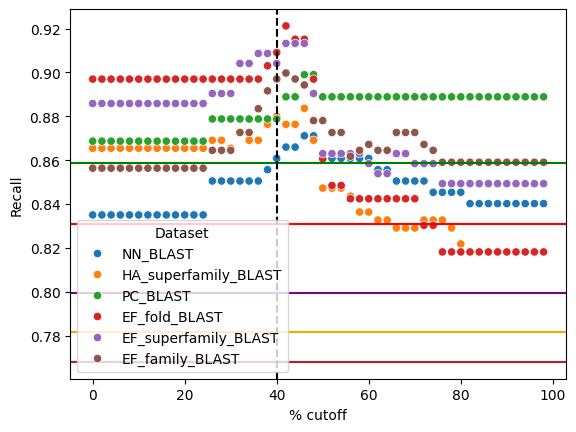

In [73]:
ax = sns.scatterplot(df, x='% cutoff', y='Recall', hue='Dataset')
ax.axhline(0.768041237, c='Blue')
ax.axhline(0.781818182, c='Orange')
ax.axhline(0.858585859, c='green')
ax.axhline(0.831050228, c='red')
ax.axhline(0.799457995, c='purple')
ax.axhline(0.768041237, c='brown')
ax.axvline(40, c='black', linestyle = 'dashed')
plt.show()

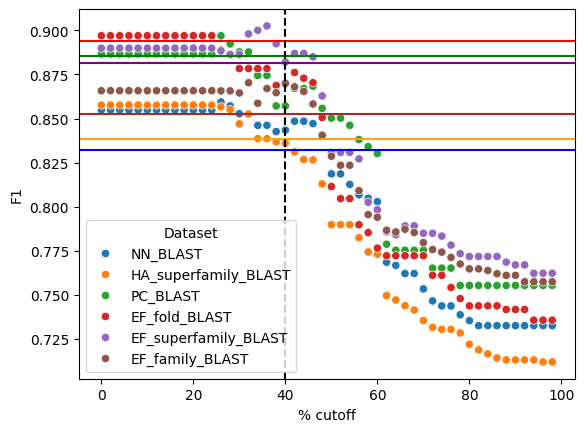

In [74]:
ax = sns.scatterplot(df, x='% cutoff', y='F1', hue='Dataset')
ax.axhline(0.832402235, c='Blue')
ax.axhline(0.838206628, c='Orange')
ax.axhline(0.885416667, c='green')
ax.axhline(0.893890675, c='red')
ax.axhline(0.881355932, c='purple')
ax.axhline(0.852601156, c='brown')
ax.axvline(40, c='black', linestyle = 'dashed')

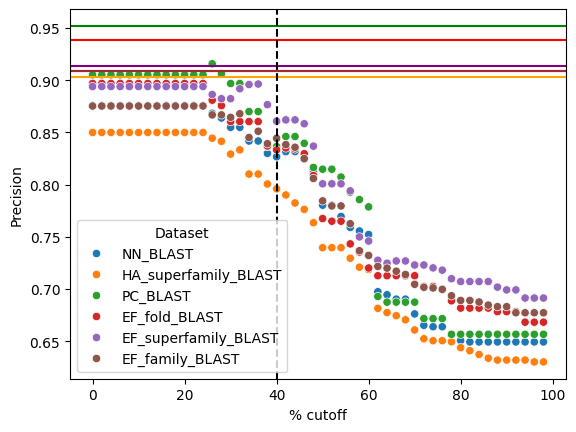

In [75]:
ax = sns.scatterplot(df, x='% cutoff', y='Precision', hue='Dataset')
ax.axhline(0.908536585, c='Blue')
ax.axhline(0.903361345, c='Orange')
ax.axhline(0.952054795, c='green')
ax.axhline(0.93814433, c='red')
ax.axhline(0.913312693, c='purple')
ax.axhline(0.908536585, c='brown')
ax.axvline(40, c='black', linestyle = 'dashed')

In [ ]:
df['Residue source'] = labels
    sns.histplot(df, x='sequence identity', bins=20, hue='Residue source', alpha=0.5)

    plt.title('Diamond blast results to SwissProt with AS')
    plt.ylabel('Frequency')
    plt.xlabel('Sequence identity')
    plt.savefig(f'Figures/DiamondBlast_histogram_{f}.svg')

In [77]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Read in squidly results
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm 
rows = []
for squidly_cutoff in tqdm(range(0, 100, 2)):
    for df_label in results:
        if df_label == 'label':
            continue
        predictions = []
        true = []
        df = results[df_label]
        squidly_df = pd.read_pickle(f'squidly/squidly_as_pred_15B_{df_label.replace("_BLAST", "")}')
        squidly_df.set_index('label', inplace=True)
        df = df.join(squidly_df, how='left')
        # Then go through and 
        # Check the agreement:
        agree, disagree, none_ = 0, 0, 0
        percent_aggree = []
        to_check = []
        labels = []
        for seq_label, res_sq, res_blast, res_squidly, seq_id, seq in df[['From', 'True_residues', 'BLAST_residues', 'Squidly_CR_Position', 'sequence identity', 'Sequence']].values:
            chosen_res_seq = res_blast
            if not res_blast or seq_id < squidly_cutoff: # Then we use res seq
                chosen_res_seq = res_squidly
                labels.append('Squidly')
            else:
                chosen_res_seq = res_blast
                labels.append('BLAST')
            if len(chosen_res_seq) > 0:
                # Calculate the F1 score
                chosen_res_seq = [int(i) for i in chosen_res_seq.split('|')]
                res_sq = [int(i) for i in res_sq.split('|')]
                for pos in range(0, len(seq)):
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
                    if pos in chosen_res_seq:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                if res_sq != chosen_res_seq:
                    to_check.append(seq_label)
                    # Check the % agree 
                    percent_aggree.append(len(set(res_sq) & set(chosen_res_seq))/max(len(res_sq), len(chosen_res_seq)))
                    disagree += 1
                else:
                    percent_aggree.append(1)
                    agree += 1
            else:
                none_ += 1
                percent_aggree.append(0)
                res_sq = [int(i) for i in res_sq.split('|')]
                for pos in range(0, len(seq)):
                    predictions.append(0)
                    if pos in res_sq:
                        true.append(1)
                    else:
                        true.append(0)
        precision, recall, f1, support = precision_recall_fscore_support(true, predictions)
        rows.append([df_label.replace(".pkl", ""), squidly_cutoff, f1[1], precision[1], recall[1], support[1], agree/len(df), disagree/len(df), none_/len(df), np.mean(percent_aggree)])


100%|██████████████████████████████████████████████████| 50/50 [00:39<00:00,  1.26it/s]


In [78]:
df = pd.DataFrame(rows, columns=['Dataset', '% cutoff', 'F1', 'Precision', 'Recall', 'Support', '% fully correct', ' % with difference', ' % missing', 'Mean correct'])
df.to_csv('Ensemble_Squidly_15B.csv', index=False)

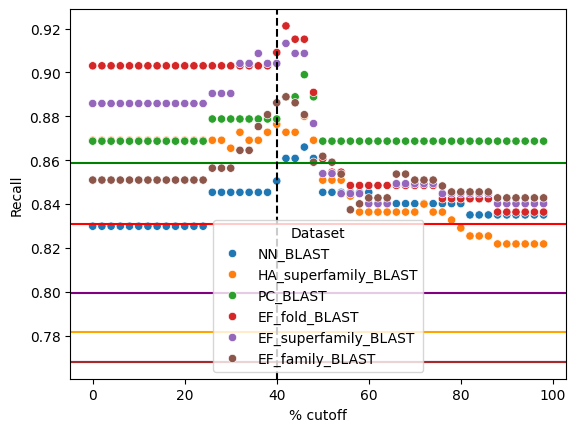

In [79]:
ax = sns.scatterplot(df, x='% cutoff', y='Recall', hue='Dataset')
ax.axhline(0.768041237, c='Blue')
ax.axhline(0.781818182, c='Orange')
ax.axhline(0.858585859, c='green')
ax.axhline(0.831050228, c='red')
ax.axhline(0.799457995, c='purple')
ax.axhline(0.768041237, c='brown')
ax.axvline(40, c='black', linestyle = 'dashed')
plt.show()

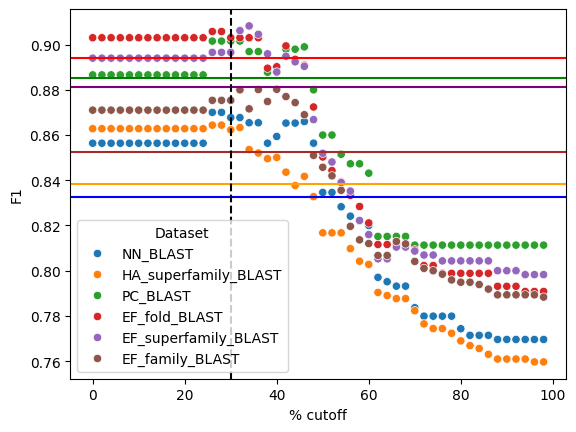

In [89]:
ax = sns.scatterplot(df, x='% cutoff', y='F1', hue='Dataset')
ax.axhline(0.832402235, c='Blue')
ax.axhline(0.838206628, c='Orange')
ax.axhline(0.885416667, c='green')
ax.axhline(0.893890675, c='red')
ax.axhline(0.881355932, c='purple')
ax.axhline(0.852601156, c='brown')
ax.axvline(30, c='black', linestyle = 'dashed')
plt.show()

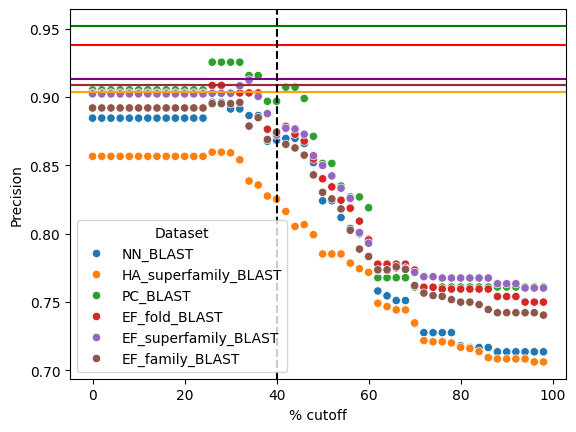

In [81]:
ax = sns.scatterplot(df, x='% cutoff', y='Precision', hue='Dataset')
ax.axhline(0.908536585, c='Blue')
ax.axhline(0.903361345, c='Orange')
ax.axhline(0.952054795, c='green')
ax.axhline(0.93814433, c='red')
ax.axhline(0.913312693, c='purple')
ax.axhline(0.908536585, c='brown')
ax.axvline(40, c='black', linestyle = 'dashed')

In [88]:
df[df['% cutoff'] == 30]

,Dataset,% cutoff,F1,Precision,Recall,Support,% fully correct,% with difference,% missing,Mean correct
90,NN_BLAST,30,0.867725,0.891304,0.845361,194,0.750000,0.212963,0.037037,0.829475
91,HA_superfamily_BLAST,30,0.862319,0.859206,0.865455,275,0.736842,0.230263,0.032895,0.816557
92,PC_BLAST,30,0.901554,0.925532,0.878788,99,0.818182,0.163636,0.018182,0.860606
93,EF_fold_BLAST,30,0.903030,0.903030,0.903030,165,0.774194,0.204301,0.021505,0.848566
94,EF_superfamily_BLAST,30,0.896552,0.902778,0.890411,219,0.788618,0.186992,0.024390,0.853659
95,EF_family_BLAST,30,0.875346,0.895184,0.856369,369,0.775510,0.198980,0.025510,0.851616


In [51]:
df.to_csv(f'blast/{label.replace(".pkl", ".csv")}')
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    for seq_label, res_sq, res_blast in df[['From', 'True_residues', 'BLAST_residues']].values:
        if not res_sq:
            print(seq_label, res_sq, res_blast)
        else:
            if res_sq != res_blast:
                to_check.append(seq_label)
                if not res_blast:
                    none_ += 1
                    percent_aggree.append(0)
                else:
                    # Check the % agree 
                    res_sq = res_sq.split('|')
                    res_blast = res_blast.split('|')
                    percent_aggree.append(len(set(res_sq) & set(res_blast))/max(len(res_sq), len(res_blast)))
                    disagree += 1
            else:
                percent_aggree.append(1)
                agree += 1
    print(f, agree, disagree, none_, np.mean(percent_aggree))

    plt.hist(df['sequence identity'].values, bins=20, color='grey', alpha=0.5)
    plt.title('Diamond blast results to SwissProt with AS')
    plt.ylabel('Frequency')
    plt.xlabel('Sequence identity')
    plt.savefig(f'Figures/DiamondBlast_histogram_{f}.svg')

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Fragment,Active site,Binding site,EC number,Cofactor,Residue,active_site_residue_counts
6866,O46427,reviewed,CATH_PIG,Pro-cathepsin H [Cleaved into: Cathepsin H min...,CTSH,Sus scrofa (Pig),335,MWAVLSLLCAGAWLLGPPACGASNLAVSSFEKLHFKSWMVQHQKKY...,NaN,ACT_SITE 141; ACT_SITE 281; ACT_SITE 301,NaN,3.4.22.16,NaN,140|280|300,3


In [52]:
label

'EF_family_BLAST.pkl'